<a href="https://colab.research.google.com/github/jesusdpa1/nma_computation/blob/main/w1_d4/W1D4_Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3: Dimensionality Reduction & Reconstruction

**Week 1, Day 4: Dimensionality Reduction**

**By Neuromatch Academy**

__Content creators:__ Alex Cayco Gajic, John Murray

__Content reviewers:__ Roozbeh Farhoudi, Matt Krause, Spiros Chavlis, Richard Gao, Michael Waskom,  Siddharth Suresh, Natalie Schaworonkow, Ella Batty

<p align='center'><img src='https://github.com/NeuromatchAcademy/widgets/blob/master/sponsors.png?raw=True'/></p>

---
# Tutorial Objectives

*Estimated timing of tutorial: 50 minutes*

In this notebook we'll learn to apply PCA for dimensionality reduction, using a classic dataset that is often used to benchmark machine learning algorithms: MNIST. We'll also learn how to use PCA for reconstruction and denoising.

Overview:
- Perform PCA on MNIST
- Calculate the variance explained
- Reconstruct data with different numbers of PCs
- (Bonus) Examine denoising using PCA


You can learn more about the MNIST dataset [here](https://en.wikipedia.org/wiki/MNIST_database).

##  Tutorial slides


 These are the slides for the videos in all tutorials today


In [ ]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

##  Video 1: PCA for dimensionality reduction


In [ ]:
# @title Video 1: PCA for dimensionality reduction
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1up4y1S7xs", width=730, height=410, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="oO0bbInoO_0", width=730, height=410, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

---
# Setup

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

##  Figure Settings


In [2]:
# @title Figure Settings
import ipywidgets as widgets   # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

##  Plotting Functions


In [3]:
# @title Plotting Functions

def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.show()


def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 250])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  plt.imshow(np.real(np.reshape(weights, (28, 28))), cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_eigenvalues(evals, limit=True):
  """
  Plots eigenvalues.

  Args:
     (numpy array of floats) : Vector of eigenvalues

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  if limit:
    plt.show()

##  Helper Functions


In [4]:
# @title Helper Functions

def add_noise(X, frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.

  Args:
     X (numpy array of floats)  : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels

  Returns:
     (numpy array of floats)    : Data matrix + noise

  """

  X_noisy = np.reshape(X, (X.shape[0] * X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0], size=N_noise_ixs,
                               replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0, 255, noise_ixs.shape)
  X_noisy = np.reshape(X_noisy, (X.shape[0], X.shape[1]))

  return X_noisy


def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)

  return Y


def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
"""

  X = X - np.mean(X, 0)
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
  return cov_matrix


def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    :   Vector of eigenvalues
    evectors (numpy array of floats) :   Corresponding matrix of eigenvectors
                                         each column corresponds to a different
                                         eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2)*np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]

  return evals, evectors


def pca(X):
  """
  Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order

  Args:
     X (numpy array of floats) :   Data matrix each column corresponds to a
                                   different random variable

  Returns:
    (numpy array of floats)    : Data projected onto the new basis
    (numpy array of floats)    : Corresponding matrix of eigenvectors
    (numpy array of floats)    : Vector of eigenvalues

  """

  X = X - np.mean(X, 0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eigh(cov_matrix)
  evals, evectors = sort_evals_descending(evals, evectors)
  score = change_of_basis(X, evectors)

  return score, evectors, evals

---
# Section 1: Perform PCA on MNIST

The MNIST dataset consists of 70,000 images of individual handwritten digits. Each image is a 28x28 pixel grayscale image. For convenience, each 28x28 pixel image is often unravelled into a single 784 (=28x28) element vector, so that the whole dataset is represented as a 70,000 x 784 matrix. Each row represents a different image, and each column represents a different pixel.
 
Enter the following cell to load the MNIST dataset and plot the first nine images. It may take a few minutes to load.

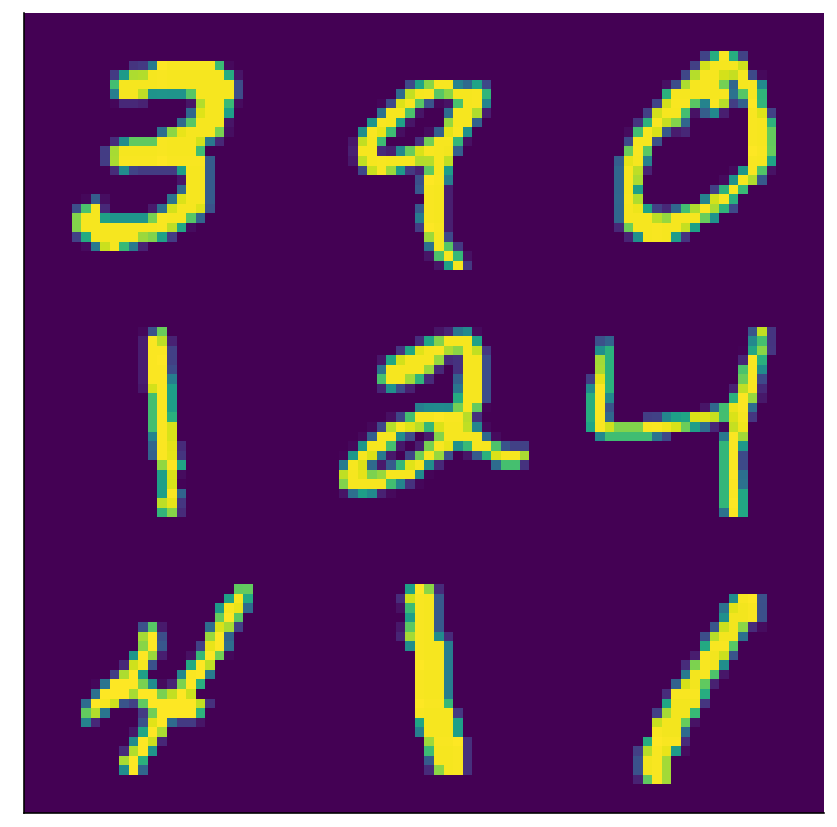

In [5]:
from sklearn.datasets import fetch_openml

# GET mnist data
mnist = fetch_openml(name='mnist_784', as_frame = False)
X = mnist.data

# Visualize
plot_MNIST_sample(X)

The MNIST dataset has an extrinsic dimensionality of 784, much higher than the 2-dimensional examples used in the previous tutorials! To make sense of this data, we'll use dimensionality reduction. But first, we need to determine the intrinsic dimensionality $K$ of the data. One way to do this is to look for an "elbow" in the scree plot, to determine which eigenvalues are significant.

## Coding Exercise 1: Scree plot of MNIST

In this exercise you will examine the scree plot in the MNIST dataset.

**Steps:**
- Perform PCA on the dataset using our function `pca` from tutorial 2 (already loaded in) and examine the scree plot. 
- When do the eigenvalues appear (by eye) to reach zero? (**Hint:** use `plt.xlim` to zoom into a section of the plot).


In [6]:
help(pca)

Help on function pca in module __main__:

pca(X)
    Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order
    
    Args:
       X (numpy array of floats) :   Data matrix each column corresponds to a
                                     different random variable
    
    Returns:
      (numpy array of floats)    : Data projected onto the new basis
      (numpy array of floats)    : Corresponding matrix of eigenvectors
      (numpy array of floats)    : Vector of eigenvalues



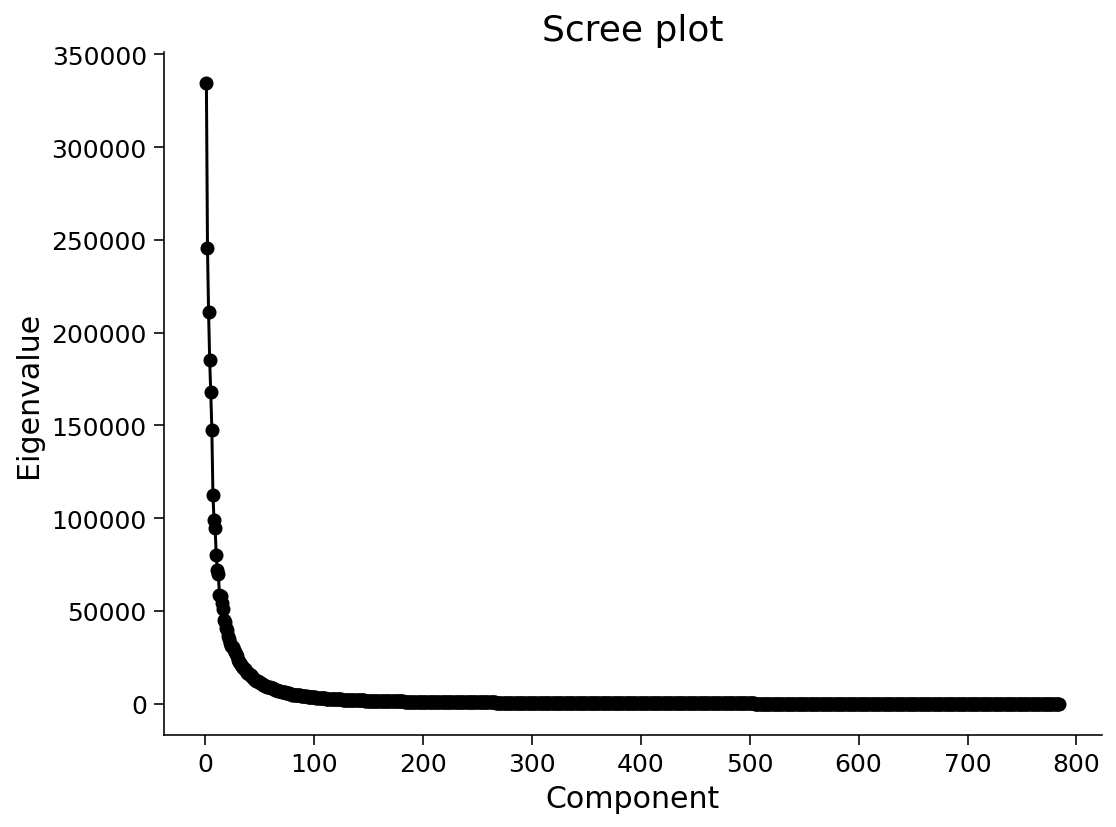

In [10]:
#################################################
## TODO for students
# Fill out function and remove
# raise NotImplementedError("Student exercise: perform PCA and visualize scree plot")
# #################################################

# Perform PCA
score, evectors, evals = pca(X)

# Plot the eigenvalues
plot_eigenvalues(evals, limit=False)
# plt.xlim(100)  # limit x-axis up to 100 for zooming

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D4_DimensionalityReduction/solutions/W1D4_Tutorial3_Solution_d8411e54.py)

*Example output:*

<img alt='Solution hint' align='left' width=849.0 height=561.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D4_DimensionalityReduction/static/W1D4_Tutorial3_Solution_d8411e54_0.png>



---
# Section 2: Calculate the variance explained

*Estimated timing to here from start of tutorial: 15 min*

The scree plot suggests that most of the eigenvalues are near zero, with fewer than 100 having large values. Another common way to determine the intrinsic dimensionality is by considering the variance explained. This can be examined with a cumulative plot of the fraction of the total variance explained by the top $K$ components, i.e.,

\begin{equation}
\text{var explained} = \frac{\sum_{i=1}^K \lambda_i}{\sum_{i=1}^N \lambda_i}
\end{equation}

where $\lambda_i$ is the $i^{th}$ eigenvalue and $N$ is the total number of components (the original number of dimensions in the data).

The intrinsic dimensionality is often quantified by the $K$ necessary to explain a large proportion of the total variance of the data (often a defined threshold, e.g., 90%).

## Coding Exercise 2: Plot the explained variance

In this exercise you will plot the explained variance.

**Steps:**
- Fill in the function below to calculate the fraction variance explained as a function of the number of principal components. **Hint:** use `np.cumsum`.
- Plot the variance explained using `plot_variance_explained`.

**Questions:**
- How many principal components are required to explain 90% of the variance?
- How does the intrinsic dimensionality of this dataset compare to its extrinsic dimensionality?


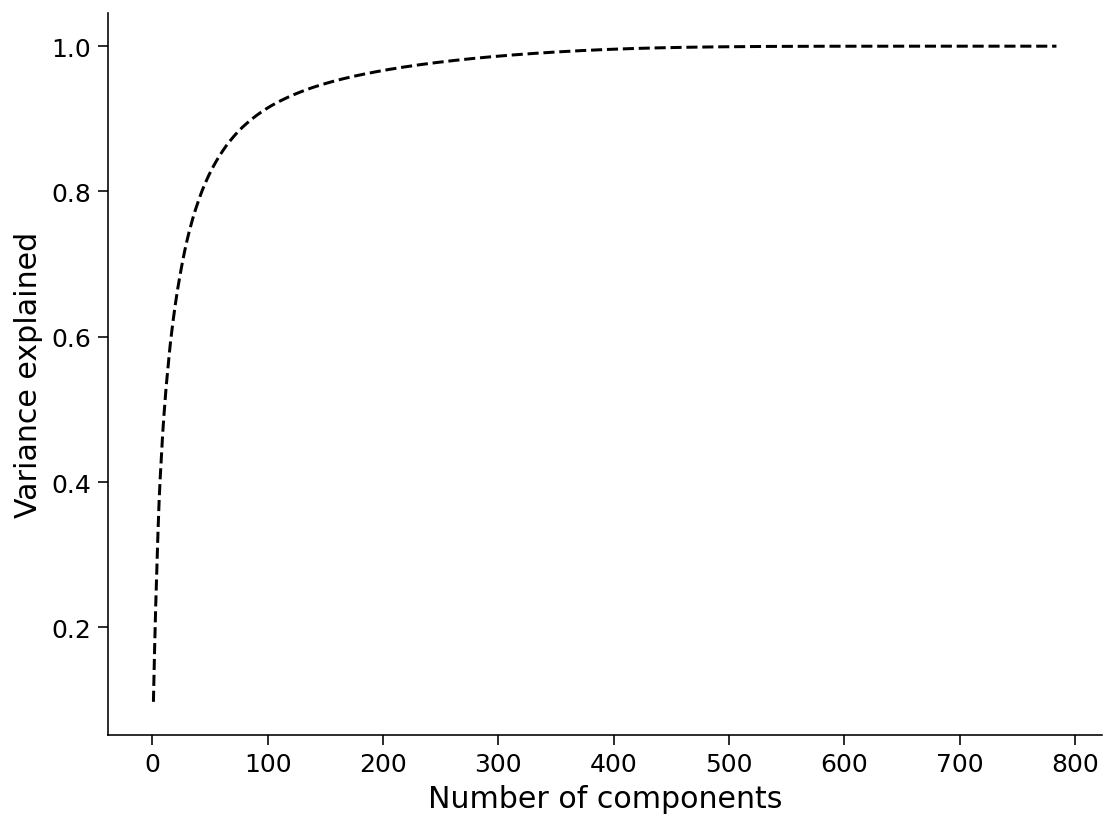

In [11]:
def get_variance_explained(evals):
  """
  Calculates variance explained from the eigenvalues.

  Args:
    evals (numpy array of floats) : Vector of eigenvalues

  Returns:
    (numpy array of floats)       : Vector of variance explained

  """

  #################################################
  ## TO DO for students: calculate the explained variance using the equation
  ## from Section 2.
  # Comment once you've filled in the function
  # raise NotImplementedError("Student exercise: calculate explain variance!")
  #################################################

  # Cumulatively sum the eigenvalues
  csum = np.cumsum(evals)

  # Normalize by the sum of eigenvalues
  variance_explained = csum / np.sum(evals)

  return variance_explained


# Calculate the variance explained
variance_explained = get_variance_explained(evals)

# Visualize
plot_variance_explained(variance_explained)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D4_DimensionalityReduction/solutions/W1D4_Tutorial3_Solution_a4ac4c9c.py)

*Example output:*

<img alt='Solution hint' align='left' width=831.0 height=544.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D4_DimensionalityReduction/static/W1D4_Tutorial3_Solution_a4ac4c9c_0.png>



---
# Section 3: Reconstruct data with different numbers of PCs

*Estimated timing to here from start of tutorial: 25 min*



##  Video 2: Data Reconstruction


In [ ]:
# @title Video 2: Data Reconstruction
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1XK4y1s7KF", width=730, height=410, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="ZCUhW26AdBQ", width=730, height=410, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

Now we have seen that the top 100 or so principal components of the data can explain most of the variance. We can use this fact to perform *dimensionality reduction*, i.e., by storing the data using only 100 components rather than the samples of all 784 pixels. Remarkably, we will be able to reconstruct much of the structure of the data using only the top 100 components. To see this, recall that to perform PCA we projected the data $\bf X$ onto the eigenvectors of the covariance matrix:

\begin{equation}
\bf S = X W
\end{equation}

Since $\bf W$ is an orthogonal matrix, ${\bf W}^{-1} = {\bf W}^\top$. So by multiplying by ${\bf W}^\top$ on each side we can rewrite this equation as  

\begin{equation}
{\bf X = S W}^\top.
\end{equation}

This now gives us a way to reconstruct the data matrix from the scores and loadings. To reconstruct the data from a low-dimensional approximation, we just have to truncate these matrices.  Let's denote ${\bf S}_{1:K}$ and ${\bf W}_{1:K}$ the matrices with only the first $K$ columns of $\bf S$ and $\bf W$, respectively. Then our reconstruction is:

\begin{equation}
{\bf \hat X = S}_{1:K} ({\bf W}_{1:K})^\top.
\end{equation}

## Coding Exercise 3: Data reconstruction

Fill in the function below to reconstruct the data using different numbers of principal components. 

**Steps:**

* Fill in the following function to reconstruct the data based on the weights and scores. Don't forget to add the mean!
* Make sure your function works by reconstructing the data with all $K=784$ components. The two images should look identical.

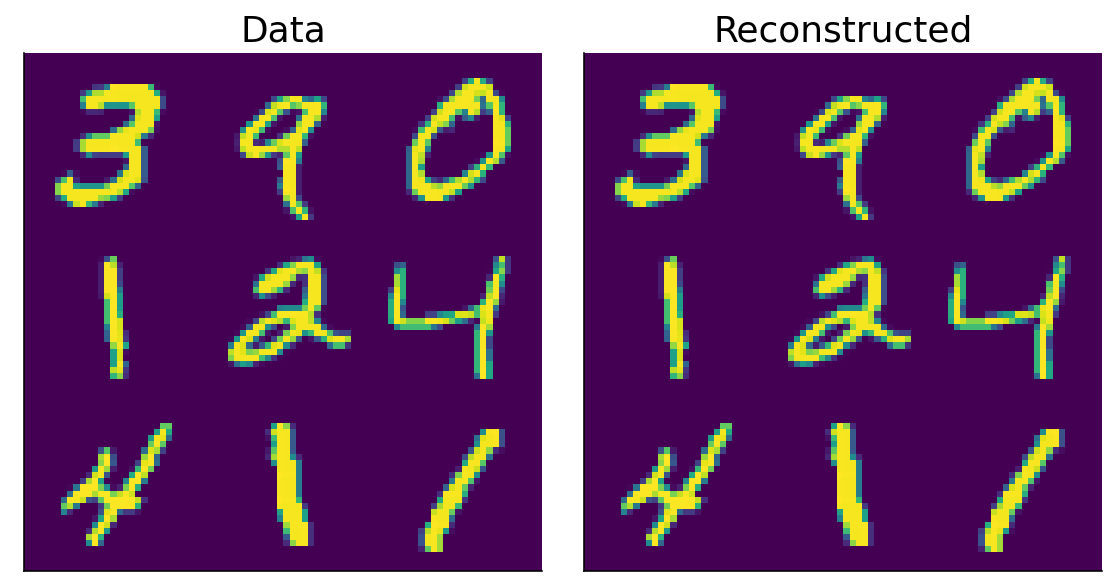

In [13]:
def reconstruct_data(score, evectors, X_mean, K):
  """
  Reconstruct the data based on the top K components.

  Args:
    score (numpy array of floats)    : Score matrix
    evectors (numpy array of floats) : Matrix of eigenvectors
    X_mean (numpy array of floats)   : Vector corresponding to data mean
    K (scalar)                       : Number of components to include

  Returns:
    (numpy array of floats)          : Matrix of reconstructed data

  """

  #################################################
  ## TO DO for students: Reconstruct the original data in X_reconstructed
  # Comment once you've filled in the function
  # raise NotImplementedError("Student exercise: reconstructing data function!")
  #################################################

  # Reconstruct the data from the score and eigenvectors
  # Don't forget to add the mean!!
  X_reconstructed =   np.matmul(score[:, :K], evectors[:, :K].T) + X_mean


  return X_reconstructed


K = 784

# Reconstruct the data based on all components
X_mean = np.mean(X, 0)
X_reconstructed = reconstruct_data(score, evectors, X_mean, K)

# Plot the data and reconstruction
plot_MNIST_reconstruction(X, X_reconstructed)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D4_DimensionalityReduction/solutions/W1D4_Tutorial3_Solution_e3395916.py)

*Example output:*

<img alt='Solution hint' align='left' width=849.0 height=451.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D4_DimensionalityReduction/static/W1D4_Tutorial3_Solution_e3395916_0.png>



## Interactive Demo 3: Reconstruct the data matrix using different numbers of PCs

Now run the code below and experiment with the slider to reconstruct the data matrix using different numbers of principal components.

1.  How many principal components are necessary to reconstruct the numbers (by eye)? How does this relate to the intrinsic dimensionality of the data?
2.  Do you see any information in the data with only a single principal component?

### 


 Make sure you execute this cell to enable the widget!


In [14]:
# @title

# @markdown Make sure you execute this cell to enable the widget!


def refresh(K=100):
  X_reconstructed = reconstruct_data(score, evectors, X_mean, K)
  plot_MNIST_reconstruction(X, X_reconstructed)
  plt.title('Reconstructed, K={}'.format(K))


_ = widgets.interact(refresh, K=(1, 784, 10))

interactive(children=(IntSlider(value=100, description='K', max=784, min=1, step=10), Output()), _dom_classes=…

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D4_DimensionalityReduction/solutions/W1D4_Tutorial3_Solution_f041ae81.py)



---
# Section 4: Visualize PCA components

*Estimated timing to here from start of tutorial: 40 min*

## Coding Exercise 4: Visualization of the weights

Next, let's take a closer look at the first principal component by visualizing its corresponding weights. 

**Steps:**

* Enter `plot_MNIST_weights` to visualize the weights of the first basis vector.
* What structure do you see? Which pixels have a strong positive weighting? Which have a strong negative weighting? What kinds of images would this basis vector differentiate (hint: think about the last demo with 1 component)?
* Try visualizing the second and third basis vectors. Do you see any structure? What about the 100th basis vector? 500th? 700th?

In [15]:
help(plot_MNIST_weights)

Help on function plot_MNIST_weights in module __main__:

plot_MNIST_weights(weights)
    Visualize PCA basis vector weights for MNIST. Red = positive weights,
    blue = negative weights, white = zero weight.
    
    Args:
       weights (numpy array of floats) : PCA basis vector
    
    Returns:
       Nothing.



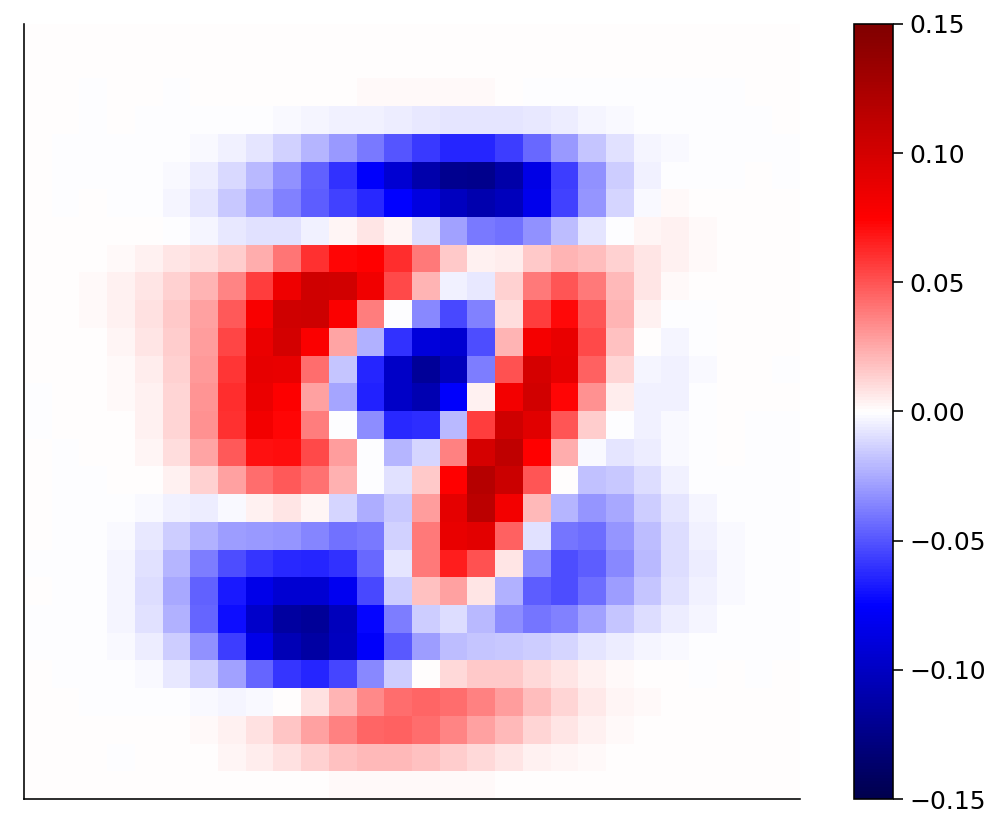

In [17]:
################################################################
# Comment once you've filled in the function
# raise NotImplementedError("Student exercise: visualize PCA components")
################################################################

# Plot the weights of the first principal component
plot_MNIST_weights(evectors[:, 1])

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D4_DimensionalityReduction/solutions/W1D4_Tutorial3_Solution_d27990ad.py)

*Example output:*

<img alt='Solution hint' align='left' width=682.0 height=544.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D4_DimensionalityReduction/static/W1D4_Tutorial3_Solution_d27990ad_0.png>



---
# Summary

*Estimated timing of tutorial: 50 minutes*

* In this tutorial, we learned how to use PCA for dimensionality reduction by selecting the top principal components. This can be useful as the intrinsic dimensionality ($K$) is often less than the extrinsic dimensionality ($N$) in neural data. $K$ can be inferred by choosing the number of eigenvalues necessary to capture some fraction of the variance.
* We also learned how to reconstruct an approximation of the original data using the top $K$ principal components. In fact, an alternate formulation of PCA is to find the $K$ dimensional space that minimizes the reconstruction error.
* Noise tends to inflate the apparent intrinsic dimensionality, however the higher components reflect noise rather than new structure in the data. PCA can be used for denoising data by removing noisy higher components.
* In MNIST, the weights corresponding to the first principal component appear to discriminate between a 0 and 1. We will discuss the implications of this for data visualization in the following tutorial.

---
# Notation

\begin{align}
K &\quad \text{selected number of principal components}\\
N &\quad \text{total number of principal components}\\
\bf W &\quad \text{weights, loadings matrix}\\
{\bf X} &\quad \text{original data matrix}\\
\bf S &\quad \text{projected matrix, scores}\\
{\bf S}_{1:K} &\quad \text{first K columns of score matrix } \bf S\\
{\bf W}_{1:K} &\quad \text{first K columns of weight matrix } \bf W\\
\end{align}

---
# Bonus

---
## Bonus Section 1: Examine denoising using PCA

In this lecture, we saw that PCA finds an optimal low-dimensional basis to minimize the reconstruction error. Because of this property, PCA can be useful for denoising corrupted samples of the data.

### Bonus Coding Exercise 1: Add noise to the data
In this exercise you will add salt-and-pepper noise to the original data and see how that affects the eigenvalues. 

**Steps:**
- Use the function `add_noise` to add noise to 20% of the pixels.
- Then, perform PCA and plot the variance explained. How many principal components are required to explain 90% of the variance? How does this compare to the original data? 


In [18]:
help(add_noise)

Help on function add_noise in module __main__:

add_noise(X, frac_noisy_pixels)
    Randomly corrupts a fraction of the pixels by setting them to random values.
    
    Args:
       X (numpy array of floats)  : Data matrix
       frac_noisy_pixels (scalar) : Fraction of noisy pixels
    
    Returns:
       (numpy array of floats)    : Data matrix + noise



In [ ]:
#################################################
## TO DO for students
# Comment once you've filled in the function
# raise NotImplementedError("Student exercise: make MNIST noisy and compute PCA!")
#################################################

np.random.seed(2020)  # set random seed

# Add noise to data
X_noisy = ...

# Perform PCA on noisy data
score_noisy, evectors_noisy, evals_noisy = ...

# Compute variance explained
variance_explained_noisy = ...

# Visualize
plot_MNIST_sample(X_noisy)
plot_variance_explained(variance_explained_noisy)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D4_DimensionalityReduction/solutions/W1D4_Tutorial3_Solution_9615a6cd.py)



### Bonus Coding Exercise 2: Denoising

Next, use PCA to perform denoising by projecting the noise-corrupted data onto the basis vectors found from the original dataset. By taking the top K components of this projection, we can reduce noise in dimensions orthogonal to the K-dimensional latent space. 

**Steps:**
- Subtract the mean of the noise-corrupted data.
- Project the data onto the basis found with the original dataset (`evectors`, not `evectors_noisy`) and take the top $K$ components. 
- Reconstruct the data as normal, using the top 50 components. 
- Play around with the amount of noise and K to build intuition.


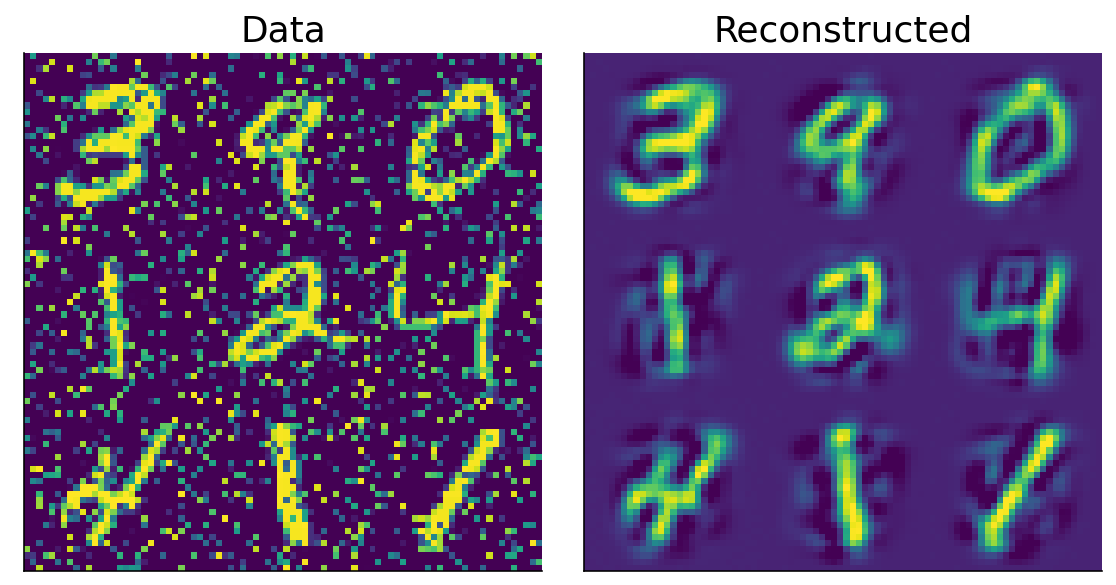

In [19]:
#################################################
## TO DO for students
# Comment once you've filled in the function
# raise NotImplementedError("Student exercise: reconstruct noisy data from PCA")
#################################################

np.random.seed(2020)  # set random seed

# Add noise to data
X_noisy = add_noise(X, .2)

# Compute mean of noise-corrupted data
X_noisy_mean = np.mean(X_noisy, 0)

# Project onto the original basis vectors
projX_noisy = np.matmul(X_noisy - X_noisy_mean, evectors) # substract the mean 

# Reconstruct the data using the top 50 components
X_reconstructed = reconstruct_data(projX_noisy, evectors, X_noisy_mean, 50)

# Visualize
plot_MNIST_reconstruction(X_noisy, X_reconstructed)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main//tutorials/W1D4_DimensionalityReduction/solutions/W1D4_Tutorial3_Solution_38d38d89.py)

*Example output:*

<img alt='Solution hint' align='left' width=849.0 height=451.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D4_DimensionalityReduction/static/W1D4_Tutorial3_Solution_38d38d89_0.png>

